# Exploratory data analysis

Here is a summary of insights from performing the EDA:

* The train dataset contains 20758 rows and 18 columns
* There are no missing or duplicate values in any of the columns
* Target Variable: Obesity Classification
* Target: Most people have Obesity_Type III at 19.5%
* Gender: distribution is roughly equal
* Family history with overweight: 82.0% do
* FAVC: 91.4% frequently consume high caloric food
* CAEC: 84.4% sometimes consume foods between meals, 1.5% do not 
* SMOKE: 98.8% are non-smokers
* SCC: 96.7% do not monitor calorie consumption
* CALC: 72.6% consume alcohol sometimes, 2.5% frequently do
* MTRANS: 96.7% use some form of vehicle, 2.4% prefer walking or cycling
* Distributions: Age, height, and weight are normally distributed with some skewness
* BMI: Obesity Type III has the highest mean BMI of 41.8, normal weight has mean BMI of 22.0
* BMI for each category is inconsistent as there are overlaps
* Normal weight or insufficient weight people tend to be younger
* Obesity Type II/III do not or rarely walk or cycle
* Gender: Obesity Type II is most common amongst males, Obesity Type III for females
* BMI is higher amongst females
* Weight and height have the greatest positive correlation
* Correlation is similar amongst original and train datasets
* Outliers: Age has outliers but no obvious outliers for remaining features


## Import library

In [1]:
import warnings

import dabl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Seaborn settings for visualizations!
rc = {
    "axes.facecolor": "#f7f9fc",
    "figure.facecolor": "#f7f9fc",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.5,
}

default_palette = "colorblind"

sns.set_theme(rc=rc)
pd.set_option("display.max_columns", 40)
pd.options.display.float_format = "{:,.2f}".format

## Import data

In [3]:
df_train = pd.read_csv("../data/raw/train.csv")
df_test = pd.read_csv("../data/raw/test.csv")
df_original = pd.read_csv("../data/raw/ObesityDataSet.csv")

## Data overview

In [4]:
print(f"Train dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns")
print(f"Test dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns")
print(
    f"Original dataset has {df_original.shape[0]} rows and {df_original.shape[1]} columns"
)

Train dataset has 20758 rows and 18 columns
Test dataset has 13840 rows and 17 columns
Original dataset has 2111 rows and 17 columns


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [6]:
display("Train:", df_train.head())
display("Test:", df_test.head())

'Train:'

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.44,1.70,81.67,yes,yes,2.00,2.98,Sometimes,no,2.76,no,0.00,0.98,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.00,1.56,57.00,yes,yes,2.00,3.00,Frequently,no,2.00,no,1.00,1.00,no,Automobile,Normal_Weight
2,2,Female,18.00,1.71,50.17,yes,yes,1.88,1.41,Sometimes,no,1.91,no,0.87,1.67,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.95,1.71,131.27,yes,yes,3.00,3.00,Sometimes,no,1.67,no,1.47,0.78,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.64,1.91,93.80,yes,yes,2.68,1.97,Sometimes,no,1.98,no,1.97,0.93,Sometimes,Public_Transportation,Overweight_Level_II


'Test:'

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.90,1.85,120.64,yes,yes,2.94,3.00,Sometimes,no,2.83,no,0.86,0.00,Sometimes,Public_Transportation
1,20759,Female,21.00,1.60,66.00,yes,yes,2.00,1.00,Sometimes,no,3.00,no,1.00,0.00,Sometimes,Public_Transportation
2,20760,Female,26.00,1.64,111.60,yes,yes,3.00,3.00,Sometimes,no,2.62,no,0.00,0.25,Sometimes,Public_Transportation
3,20761,Male,20.98,1.55,103.67,yes,yes,2.00,2.98,Sometimes,no,2.79,no,0.09,0.00,Sometimes,Public_Transportation
4,20762,Female,26.00,1.63,104.84,yes,yes,3.00,3.00,Sometimes,no,2.65,no,0.00,0.74,Sometimes,Public_Transportation


### Summarise data

In [7]:
def summarise_df(df):
    summary = pd.DataFrame(df.dtypes, columns=["data type"])
    summary["#missing"] = df.isnull().sum().values
    summary["Duplicate"] = df.duplicated().sum()
    summary["#unique"] = df.nunique().values
    desc = pd.DataFrame(df.describe(include="all").transpose())
    summary["min"] = desc["min"].values
    summary["max"] = desc["max"].values
    summary["avg"] = desc["mean"].values
    summary["std dev"] = desc["std"].values
    summary["top value"] = desc["top"].values
    summary["Freq"] = desc["freq"].values

    return summary

In [8]:
summarise_df(df_train.drop(columns=["id"])).style.background_gradient()

,data type,#missing,Duplicate,#unique,min,max,avg,std dev,top value,Freq
Gender,object,0,0,2,nan,nan,nan,nan,Female,10422
Age,float64,0,0,1703,14.000000,61.000000,23.841804,5.688072,nan,nan
Height,float64,0,0,1833,1.450000,1.975663,1.700245,0.087312,nan,nan
Weight,float64,0,0,1979,39.000000,165.057269,87.887768,26.379443,nan,nan
family_history_with_overweight,object,0,0,2,nan,nan,nan,nan,yes,17014
FAVC,object,0,0,2,nan,nan,nan,nan,yes,18982
FCVC,float64,0,0,934,1.000000,3.000000,2.445908,0.533218,nan,nan
NCP,float64,0,0,689,1.000000,4.000000,2.761332,0.705375,nan,nan
CAEC,object,0,0,4,nan,nan,nan,nan,Sometimes,17529
SMOKE,object,0,0,2,nan,nan,nan,nan,no,20513


## Exploratory data analysis

### Dabl - Auto data visualisation


Target looks like classification
Linear Discriminant Analysis training set score: 0.776


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='NObeyesdad'>,
 [<Figure size 1600x1400 with 8 Axes>,
  array([[<Axes: title={'center': '0.676'}, xlabel='Weight', ylabel='FCVC'>,
          <Axes: title={'center': '0.672'}, xlabel='Weight', ylabel='Height'>,
          <Axes: title={'center': '0.646'}, xlabel='Weight', ylabel='FAF'>,
          <Axes: title={'center': '0.643'}, xlabel='Weight', ylabel='NCP'>]],
        dtype=object),
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 1600x400 with 4 Axes>],
 array([[<Axes: title={'center': 'Gender'}, xlabel='count', ylabel='Gender'>,
         <Axes: title={'center': 'family_history_with_overweight'}, xlabel='count', ylabel='family_history_wi...'>,
         <Axes: title={'center': 'CAEC'}, xlabel='count', ylabel='CAEC'>],
        [<Axes: title={'center': 'CALC'}, xlabel='count', ylabel='CALC'>,
         <Axes: title={'center': 'MTRANS'}, xlabel='count', ylabel='MTRANS'>,
         <Axes: title={'center': 'FAVC'}, x

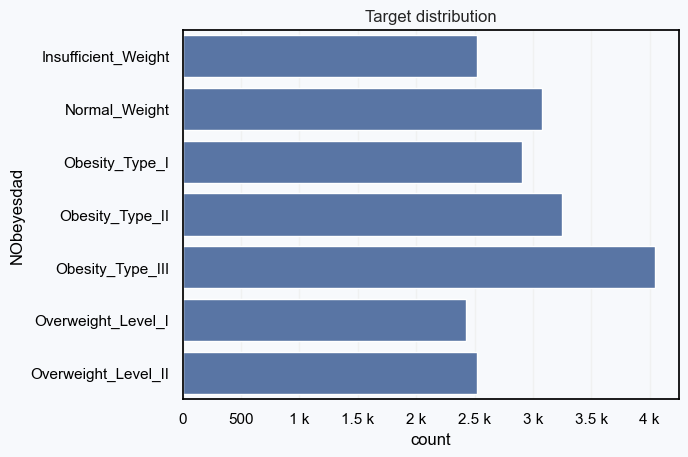

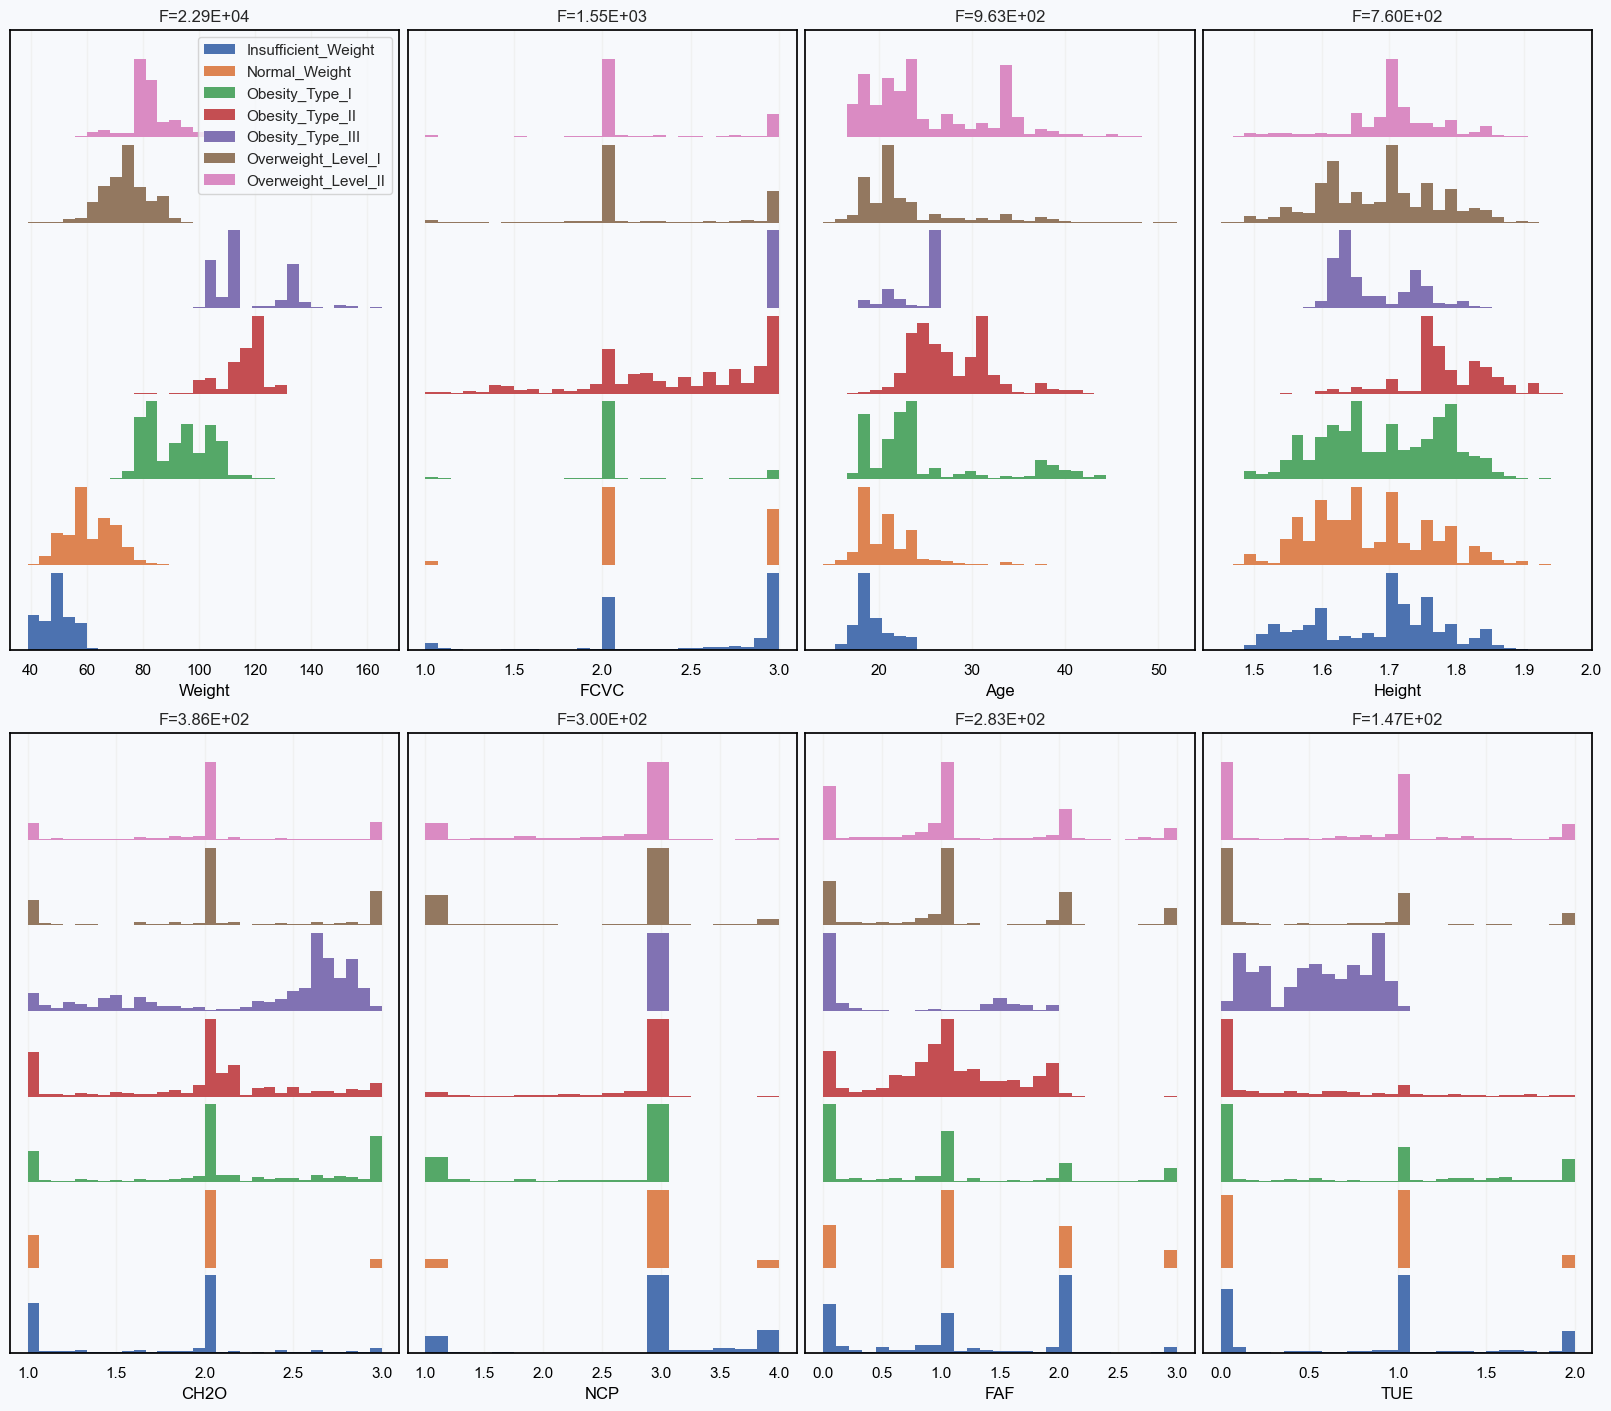

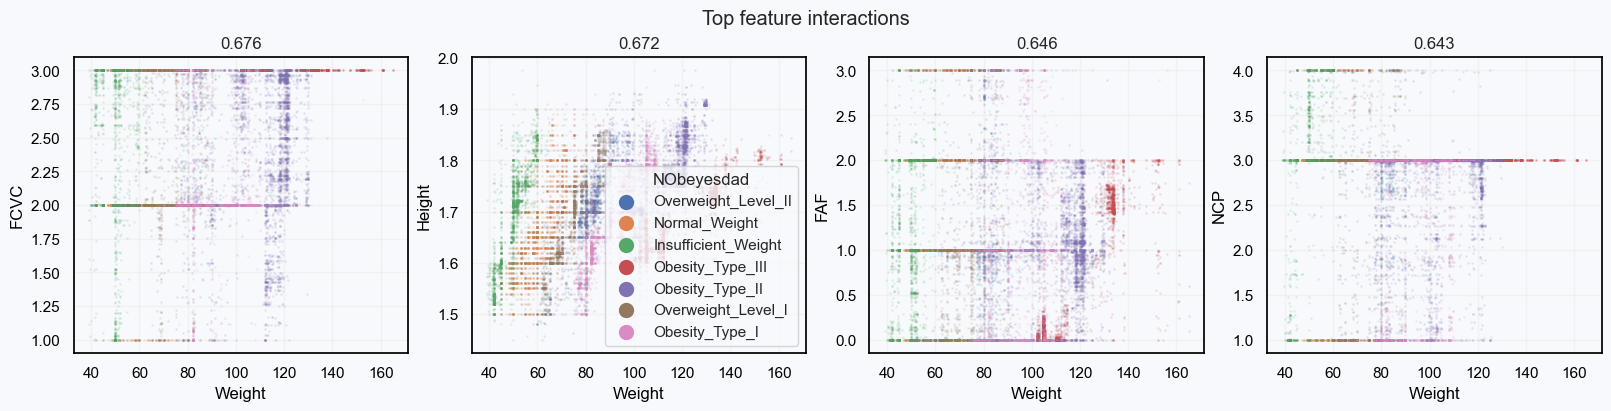

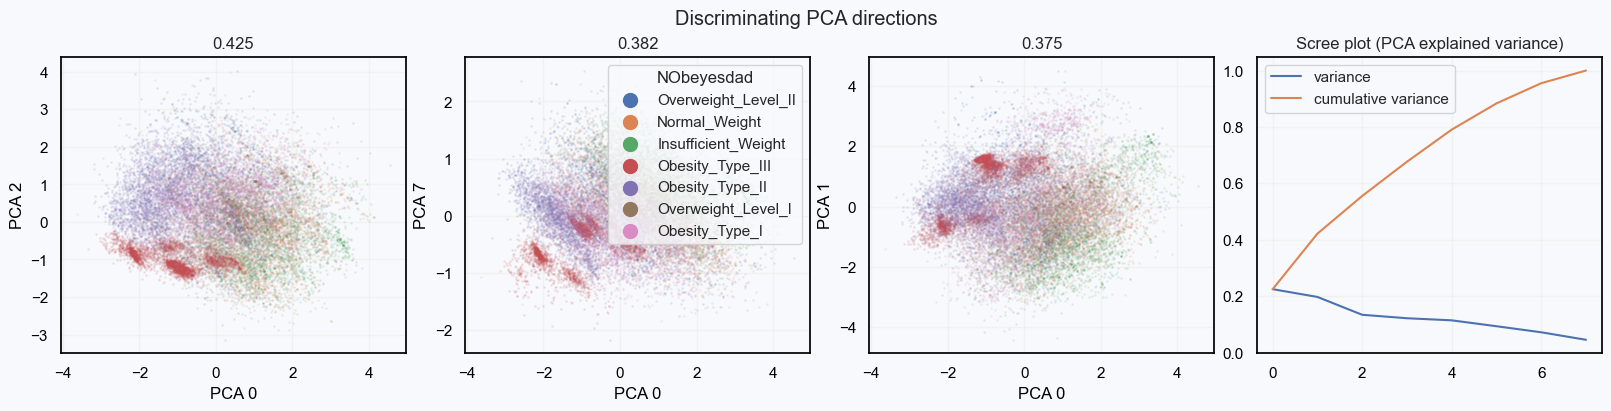

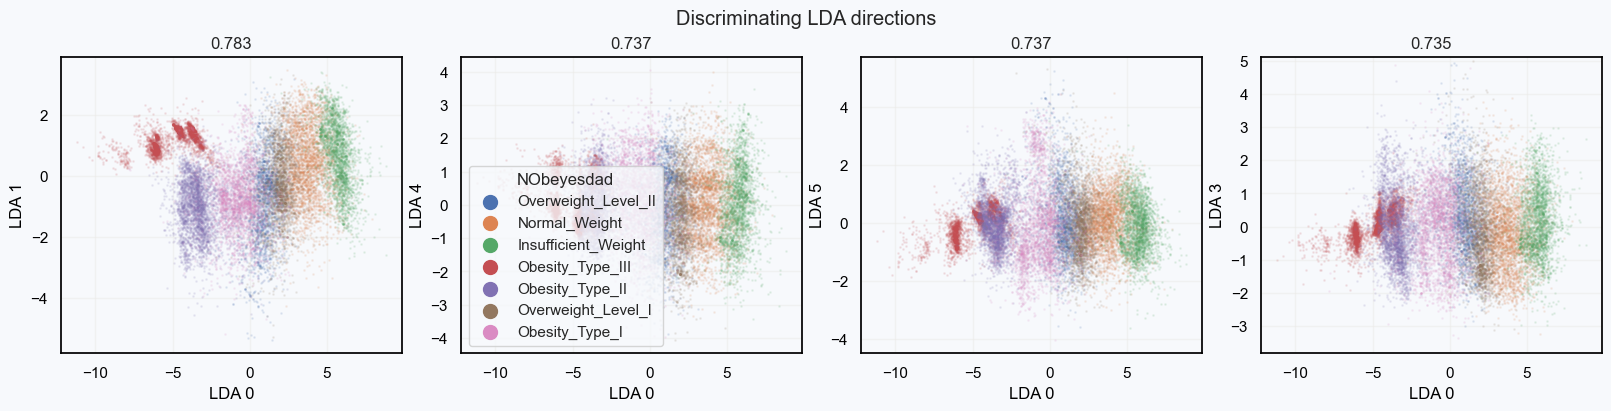

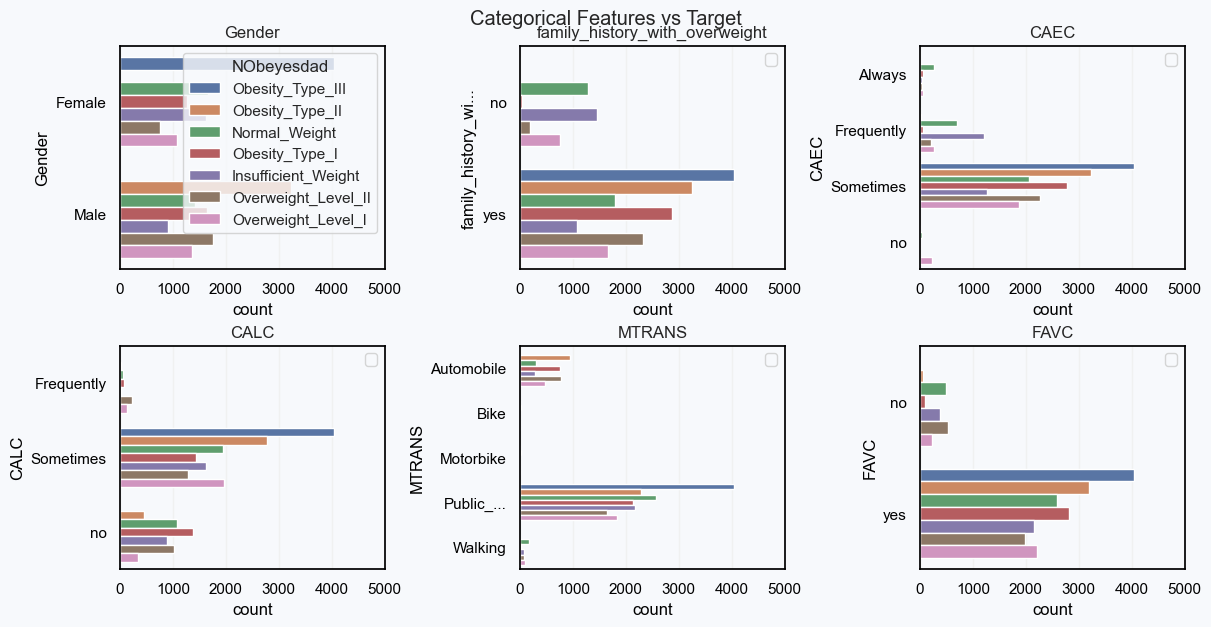

In [9]:
dabl.plot(df_train, y="NObeyesdad")

### Visualise each feature

In [10]:
def visualise_feature(columnname):
    plt.rcParams["figure.facecolor"] = "white"
    plt.rcParams["axes.facecolor"] = "white"
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax = ax.flatten()
    value_counts = df_train[columnname].value_counts()
    labels = value_counts.index.tolist()
    colors = [
        "#E69F00",
        "#56B4E9",
        "#009E73",
        "#F0E442",
        "#0072B2",
        "#D55E00",
        "#CC79A7",
    ]

    # Donut Chart
    wedges, texts, autotexts = ax[0].pie(
        value_counts,
        autopct="%1.1f%%",
        textprops={"size": 9, "color": "white", "fontweight": "bold"},
        colors=colors,
        wedgeprops=dict(width=0.35),
        startangle=80,
        pctdistance=0.85,
    )
    # circle
    centre_circle = plt.Circle((0, 0), 0.6, fc="white")
    ax[0].add_artist(centre_circle)

    # Count Plot
    sns.countplot(
        data=df_train,
        y=columnname,
        ax=ax[1],
        palette=colors,
        hue=columnname,
        legend=False,
        order=labels,
    )
    for i, v in enumerate(value_counts):
        ax[1].text(v + 1, i, str(v), color="black", fontsize=10, va="center")
    sns.despine(left=True, bottom=True)
    plt.yticks(fontsize=9, color="black")
    ax[1].set_ylabel(None)
    plt.xlabel("")
    plt.xticks([])
    fig.suptitle(columnname, fontsize=15, fontweight="bold")
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

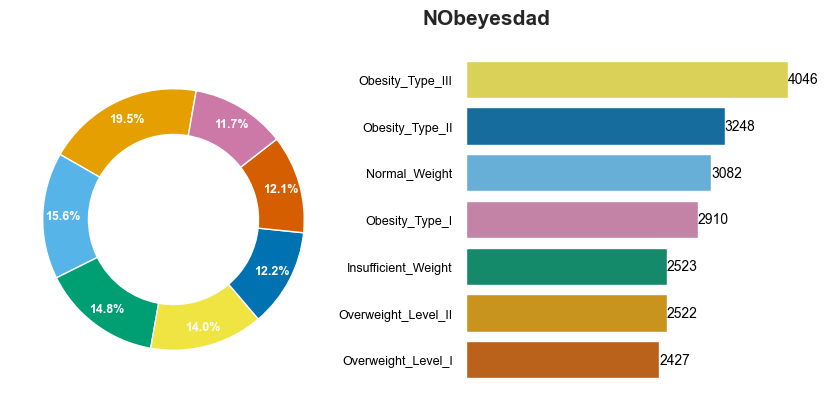

In [11]:
visualise_feature("NObeyesdad")

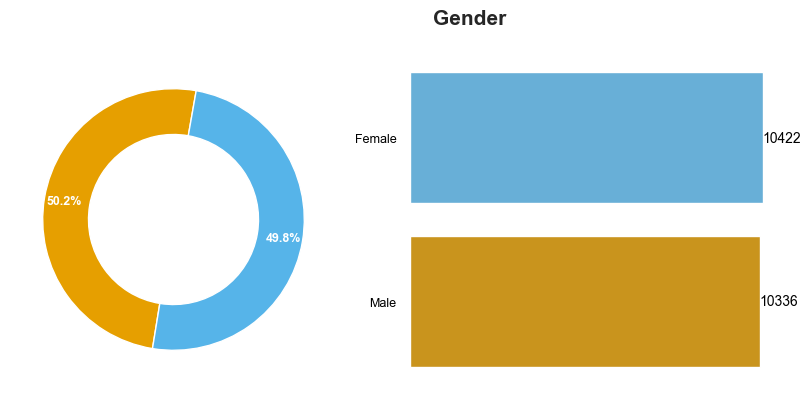

In [12]:
visualise_feature("Gender")

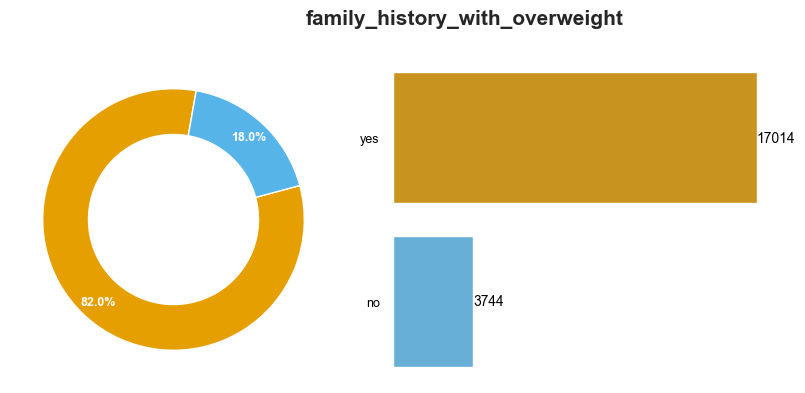

In [13]:
visualise_feature("family_history_with_overweight")

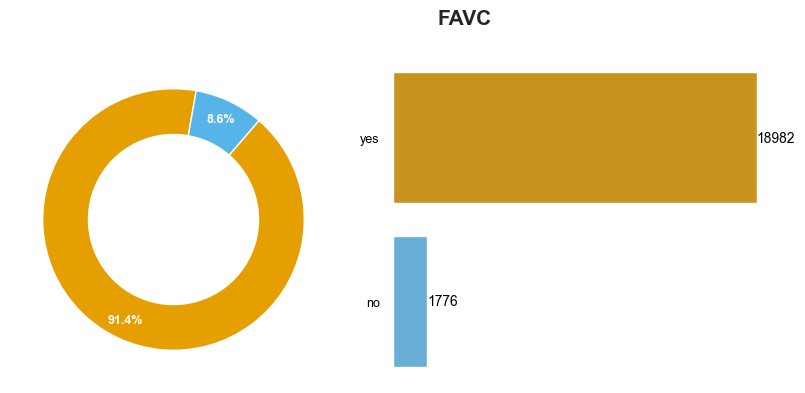

In [14]:
visualise_feature("FAVC")

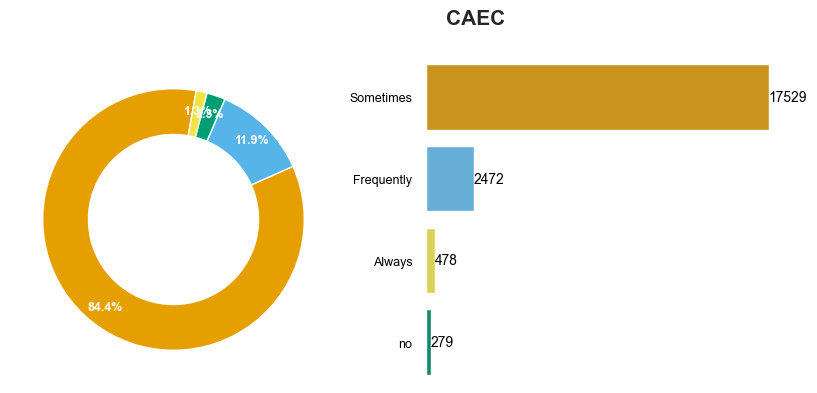

In [15]:
visualise_feature("CAEC")

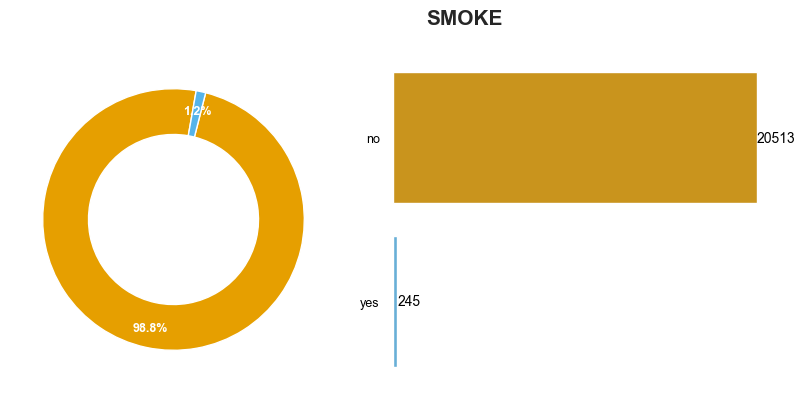

In [16]:
visualise_feature("SMOKE")

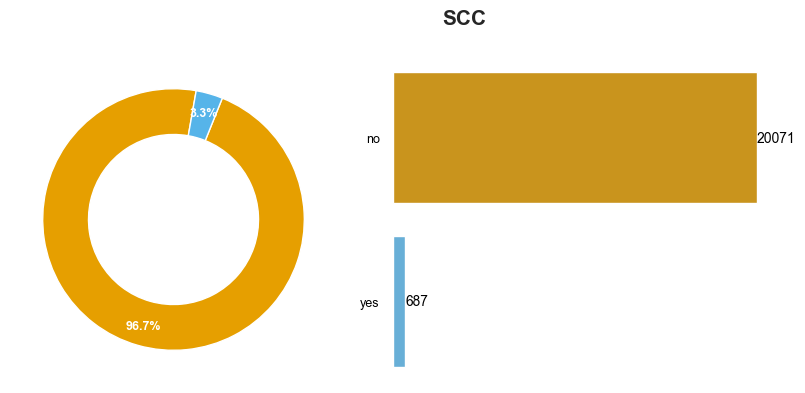

In [17]:
visualise_feature("SCC")

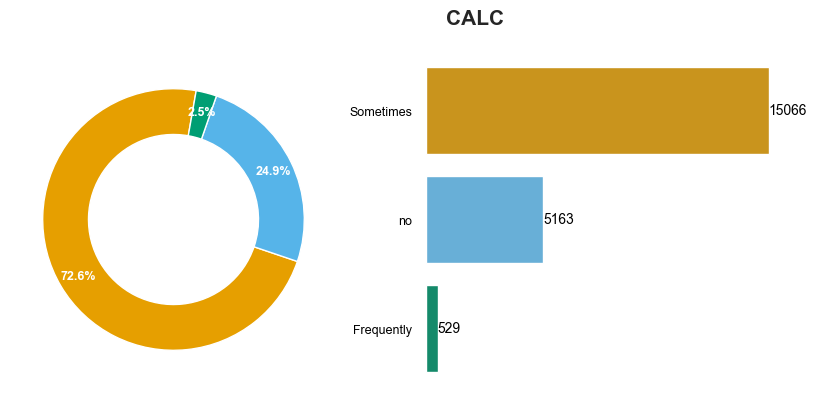

In [18]:
visualise_feature("CALC")

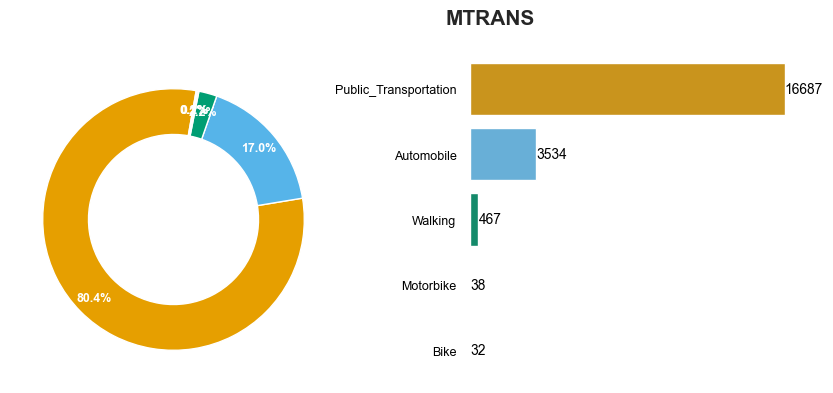

In [19]:
visualise_feature("MTRANS")

### Check distributions

In [20]:
numeric_columns = (
    df_train.select_dtypes(include=["float64", "int64"])
    .drop(columns=["id"], axis=1)
    .columns
)


def show_distribution(train_df, original_df, columns, rows=2, cols=4):
    fig, axs = plt.subplots(rows, cols, figsize=(24, 10))
    plt.suptitle(
        "Distribution for numerical features: Train vs Original Dataset",
        fontsize=16,
        fontweight="bold",
    )
    axs = axs.flatten()

    for i, col in enumerate(columns):
        sns.kdeplot(
            train_df[col],
            ax=axs[i],
            fill=True,
            alpha=0.4,
            linewidth=0.5,
            color="#05b0a3",
            label="Train",
        )
        sns.kdeplot(
            original_df[col],
            ax=axs[i],
            fill=True,
            alpha=0.4,
            linewidth=0.5,
            color="#d68c78",
            label="Original",
        )
        axs[i].set_title(
            f"{col}, Train skewness: {train_df[col].skew():.2f}\n Original skewness: {original_df[col].skew():.2f}"
        )
        axs[i].legend()

    plt.tight_layout()

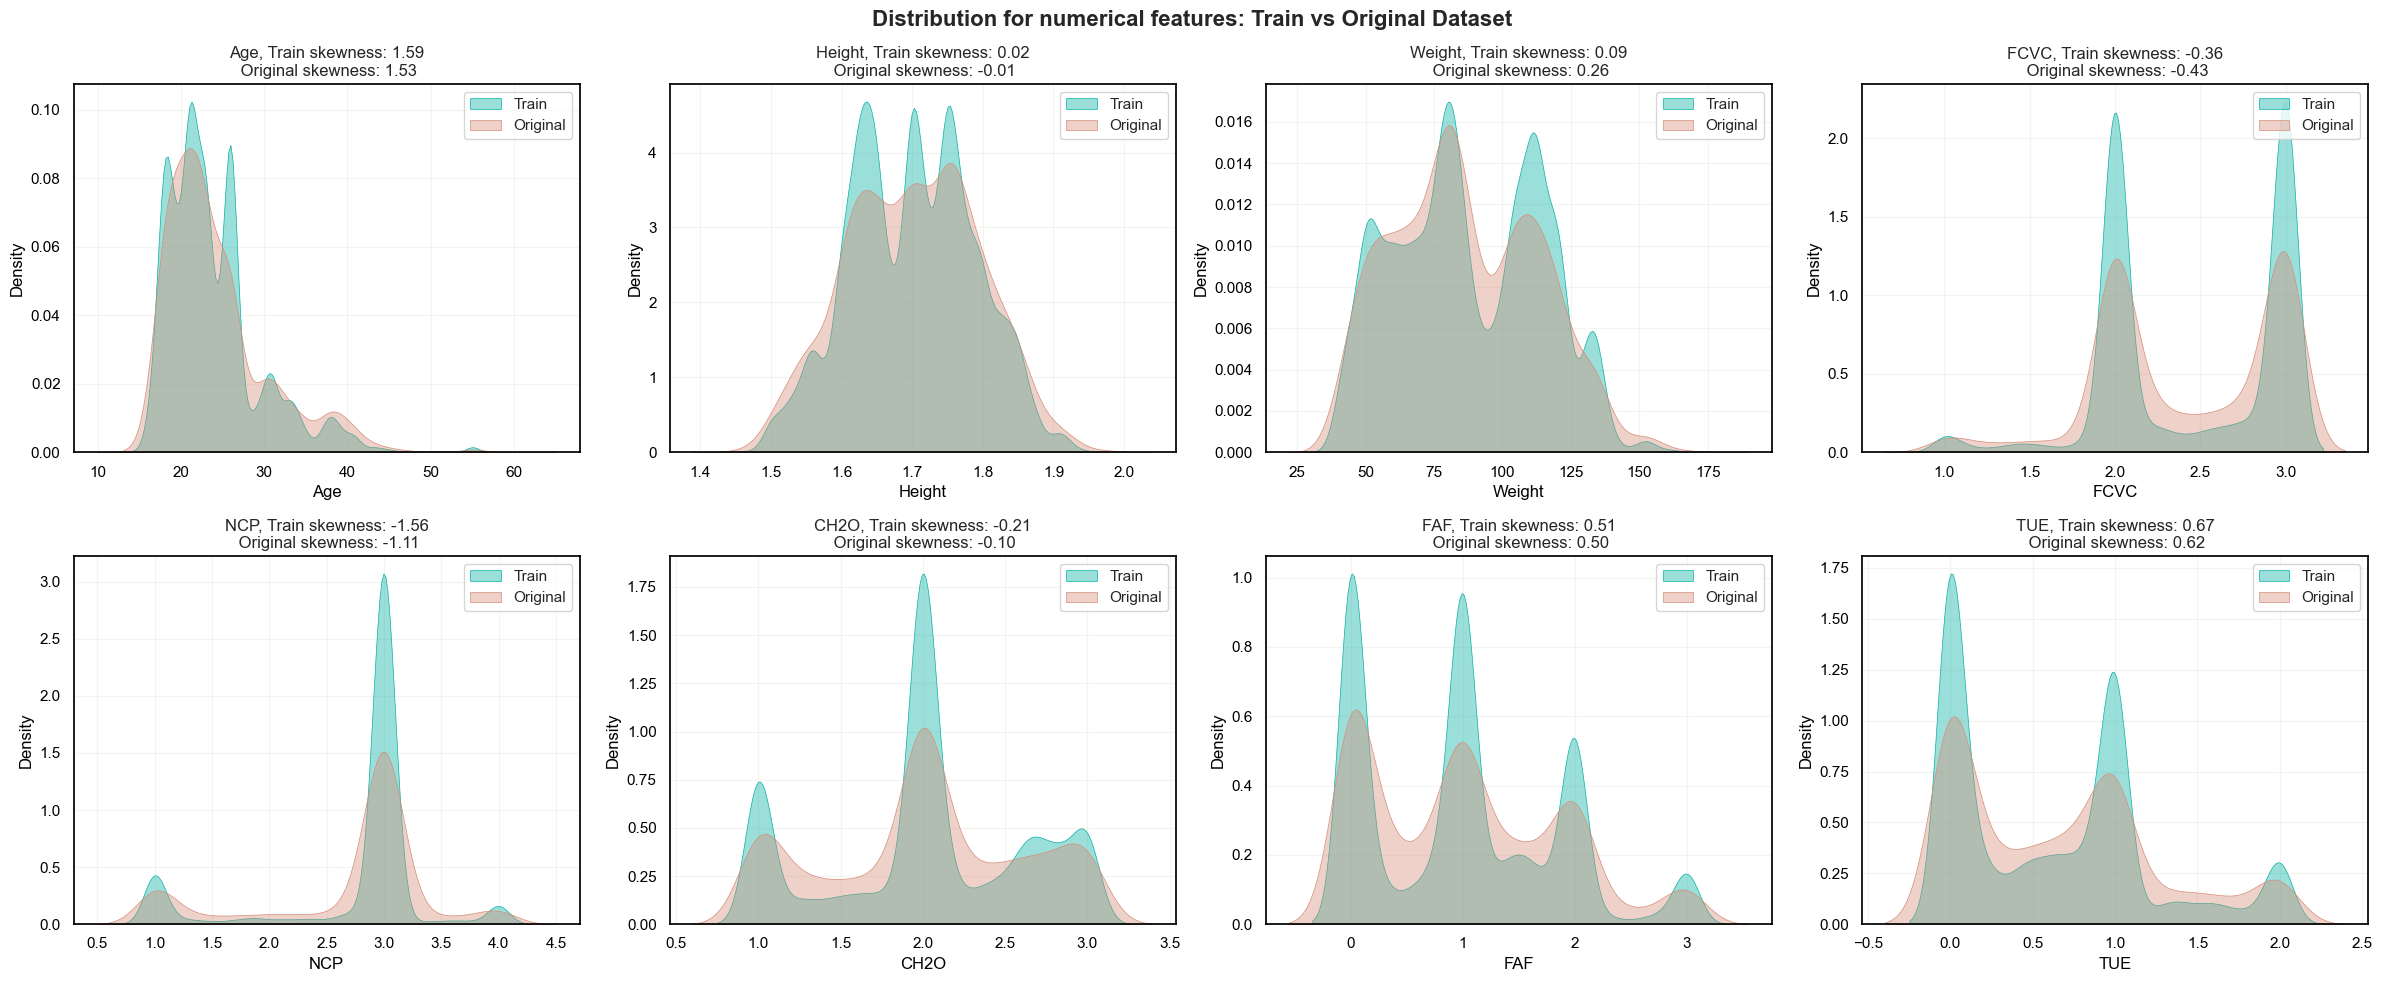

In [21]:
show_distribution(train_df=df_train, original_df=df_original, columns=numeric_columns)

### Visualise features against target

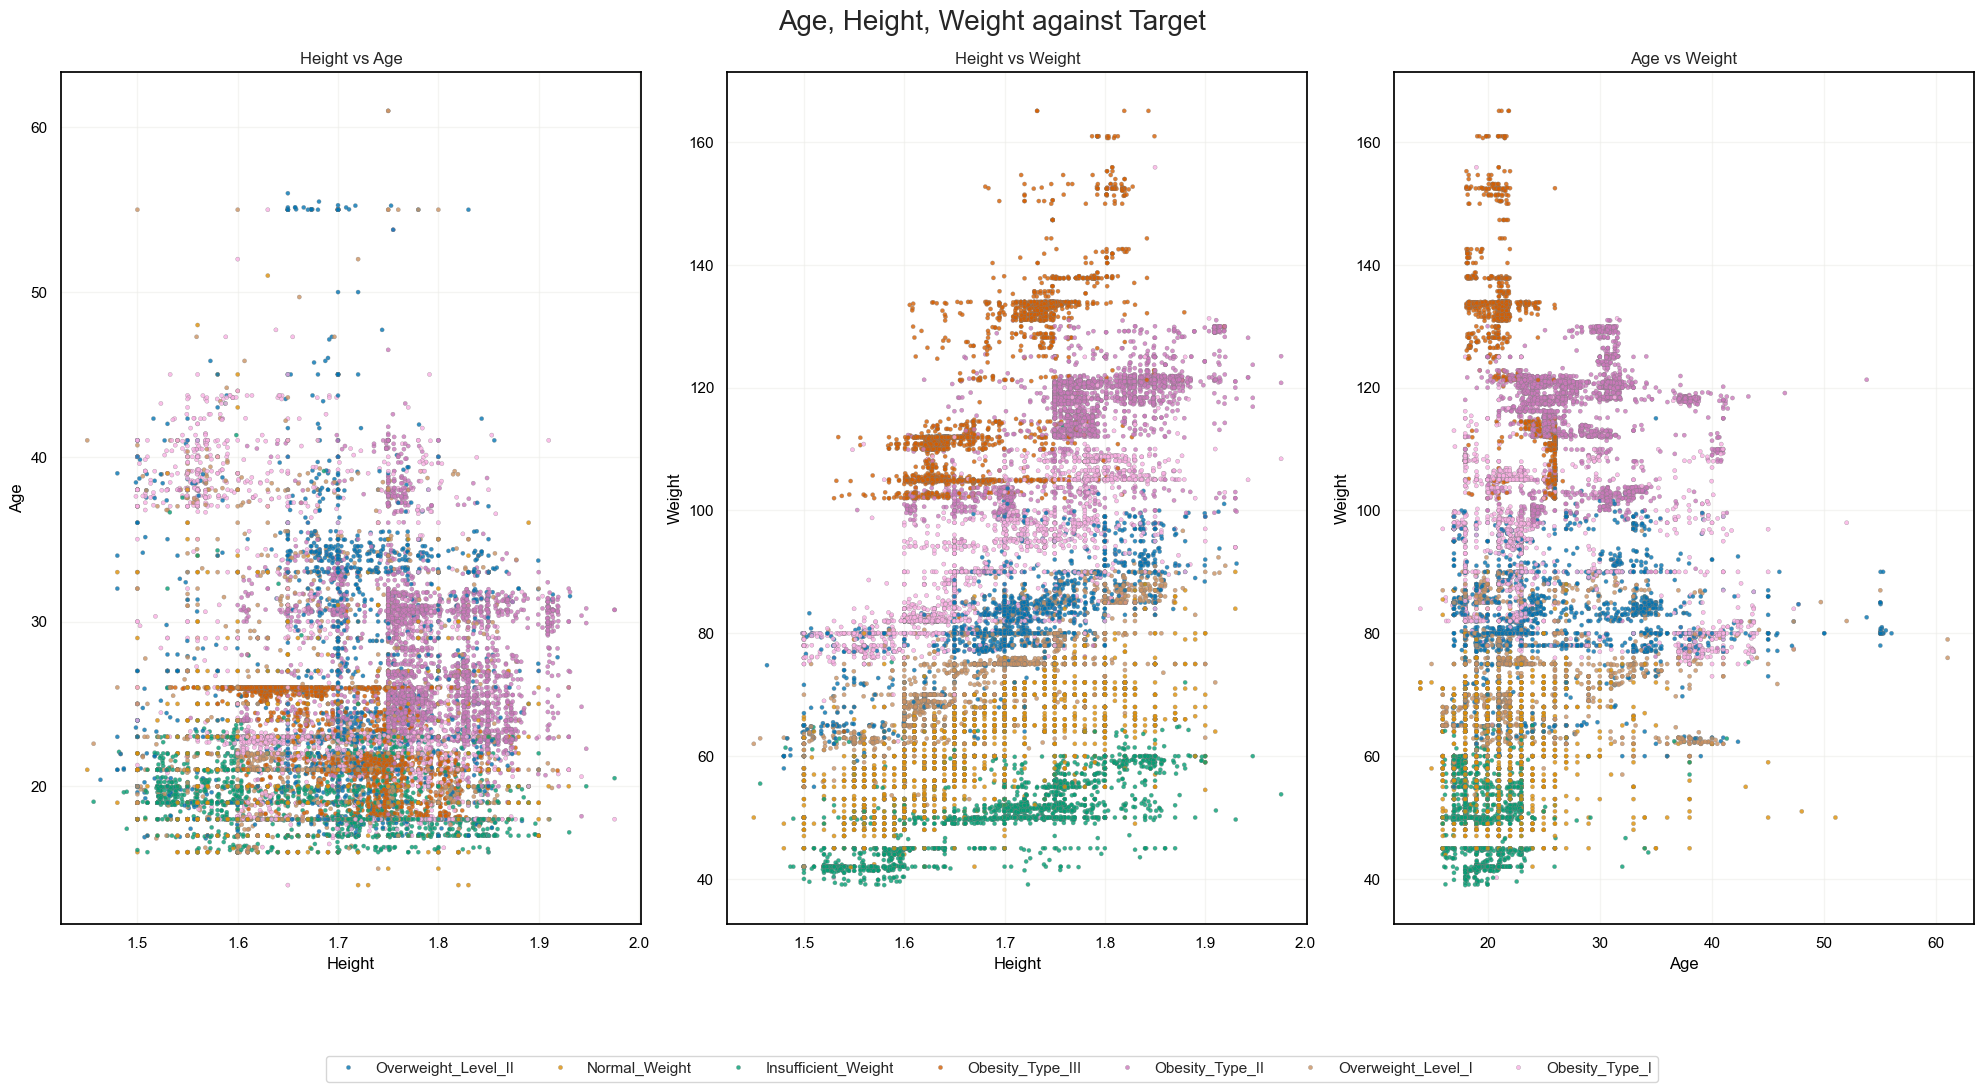

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
ax1 = sns.scatterplot(
    x=df_train["Height"],
    y=df_train["Age"],
    hue="NObeyesdad",
    data=df_train,
    palette=default_palette,
    edgecolor="grey",
    alpha=0.8,
    s=9,
    ax=axes[0],
)
axes[0].set_title("Height vs Age")
ax2 = sns.scatterplot(
    x=df_train["Height"],
    y=df_train["Weight"],
    hue="NObeyesdad",
    data=df_train,
    palette=default_palette,
    edgecolor="grey",
    alpha=0.8,
    s=9,
    ax=axes[1],
)
axes[1].set_title("Height vs Weight")
ax3 = sns.scatterplot(
    x=df_train["Age"],
    y=df_train["Weight"],
    hue="NObeyesdad",
    data=df_train,
    palette=default_palette,
    edgecolor="grey",
    alpha=0.8,
    s=9,
    ax=axes[2],
)
axes[2].set_title("Age vs Weight")
for ax in axes.flatten():
    ax.get_legend().remove()
handles, labels = ax1.get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=len(df_train["NObeyesdad"].unique()),
    title="",
)
fig.suptitle("Age, Height, Weight against Target", fontsize=20)
fig.subplots_adjust(bottom=0.5, top=0.9, hspace=0.5)
plt.tight_layout()
plt.show()

#### Create BMI and visualise against target

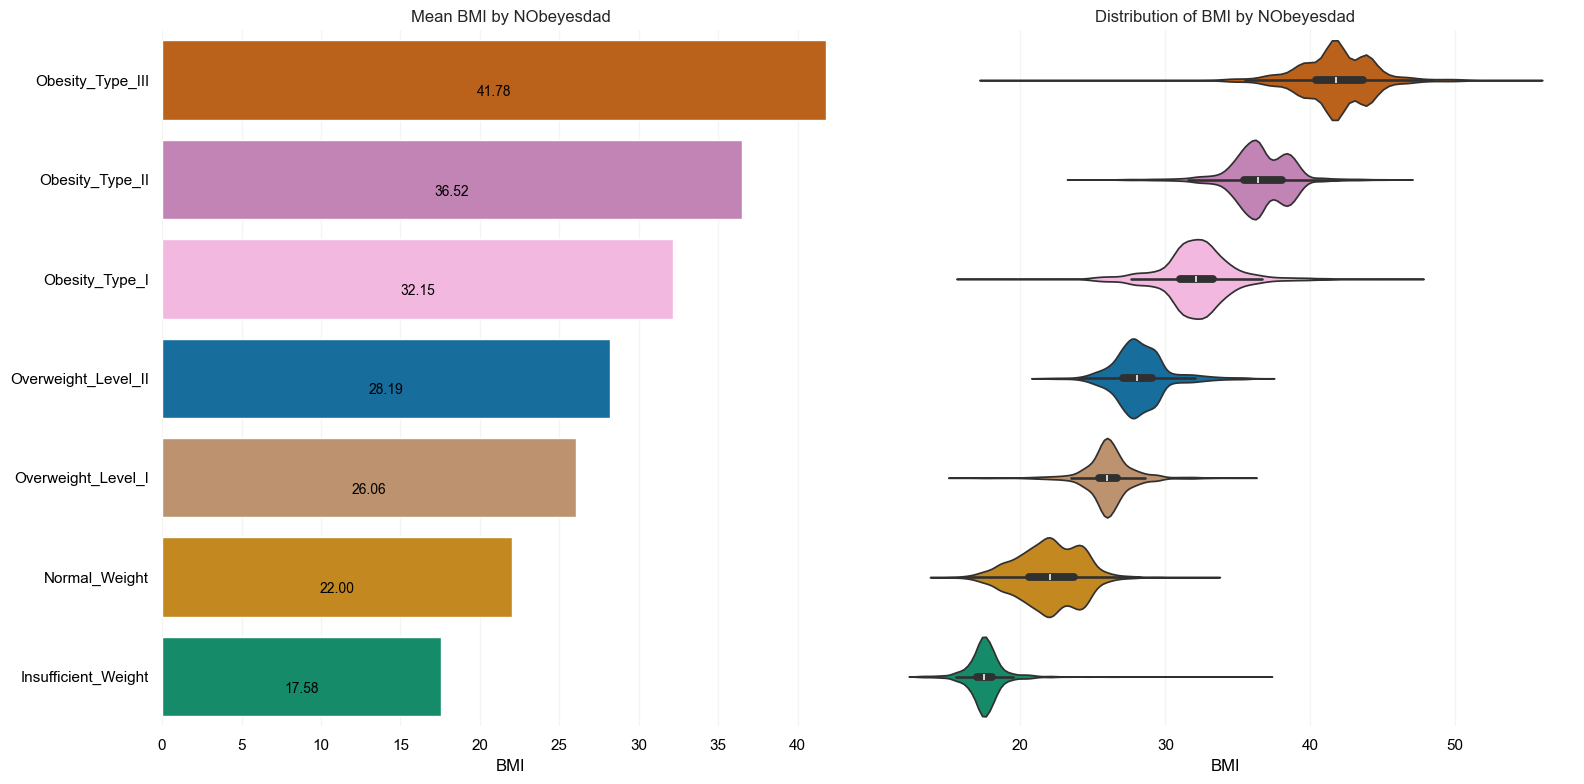

In [23]:
df_train["BMI"] = df_train["Weight"] / df_train["Height"] ** 2


fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax1 = axes[0]
df_sort = (
    df_train.groupby("NObeyesdad")["BMI"].mean().sort_values(ascending=False).index
)
sns.barplot(
    x="BMI",
    y="NObeyesdad",
    data=df_train,
    palette=default_palette,
    hue="NObeyesdad",
    order=df_sort,
    estimator=np.mean,
    errorbar=None,
    err_kws={"linewidth": 0},  # error width
    legend=False,
    ax=ax1,
)
for p in ax1.patches:
    ax1.annotate(
        f"{p.get_width():.2f}",
        (p.get_x() + p.get_width() / 2.0, p.get_y() + p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 20),
        textcoords="offset points",
        fontsize=10,
        color="black",
    )
ax1.set_title("Mean BMI by NObeyesdad")
ax1.set_xlabel("BMI")
ax1.set_ylabel("")
sns.despine(left=True, bottom=True, ax=ax1)

# Violin Plot
ax2 = axes[1]
sns.violinplot(
    x="BMI",
    y="NObeyesdad",
    data=df_train,
    palette=default_palette,
    hue="NObeyesdad",
    legend=False,
    order=df_sort,
    ax=ax2,
)
ax2.set_title("Distribution of BMI by NObeyesdad")
ax2.set_ylabel("")
plt.yticks([])
sns.despine(left=True, bottom=True, ax=ax2)
plt.tight_layout()
plt.show()

In [24]:
df_train.groupby("NObeyesdad")[
    "BMI"
].describe().reset_index().style.background_gradient()

,NObeyesdad,count,mean,std,min,25%,50%,75%,max
0,Insufficient_Weight,2523.000000,17.583619,1.388408,12.868541,17.025801,17.506390,18.025957,36.778115
1,Normal_Weight,3082.000000,22.000999,2.194097,14.631670,20.568937,22.038567,23.661439,32.882414
2,Obesity_Type_I,2910.000000,32.154649,2.513458,16.597443,31.020408,32.121386,33.298647,46.805188
3,Obesity_Type_II,3248.000000,36.521958,2.112538,24.048460,35.436970,36.378753,38.023475,46.222483
4,Obesity_Type_III,4046.000000,41.781745,2.670789,18.178670,40.371119,41.750620,43.615233,54.997991
5,Overweight_Level_I,2427.000000,26.059270,1.768697,15.761880,25.390625,25.963757,26.672763,35.555556
6,Overweight_Level_II,2522.000000,28.192491,1.835666,21.513859,27.080170,28.020083,29.086346,36.741456


### BMI vs age

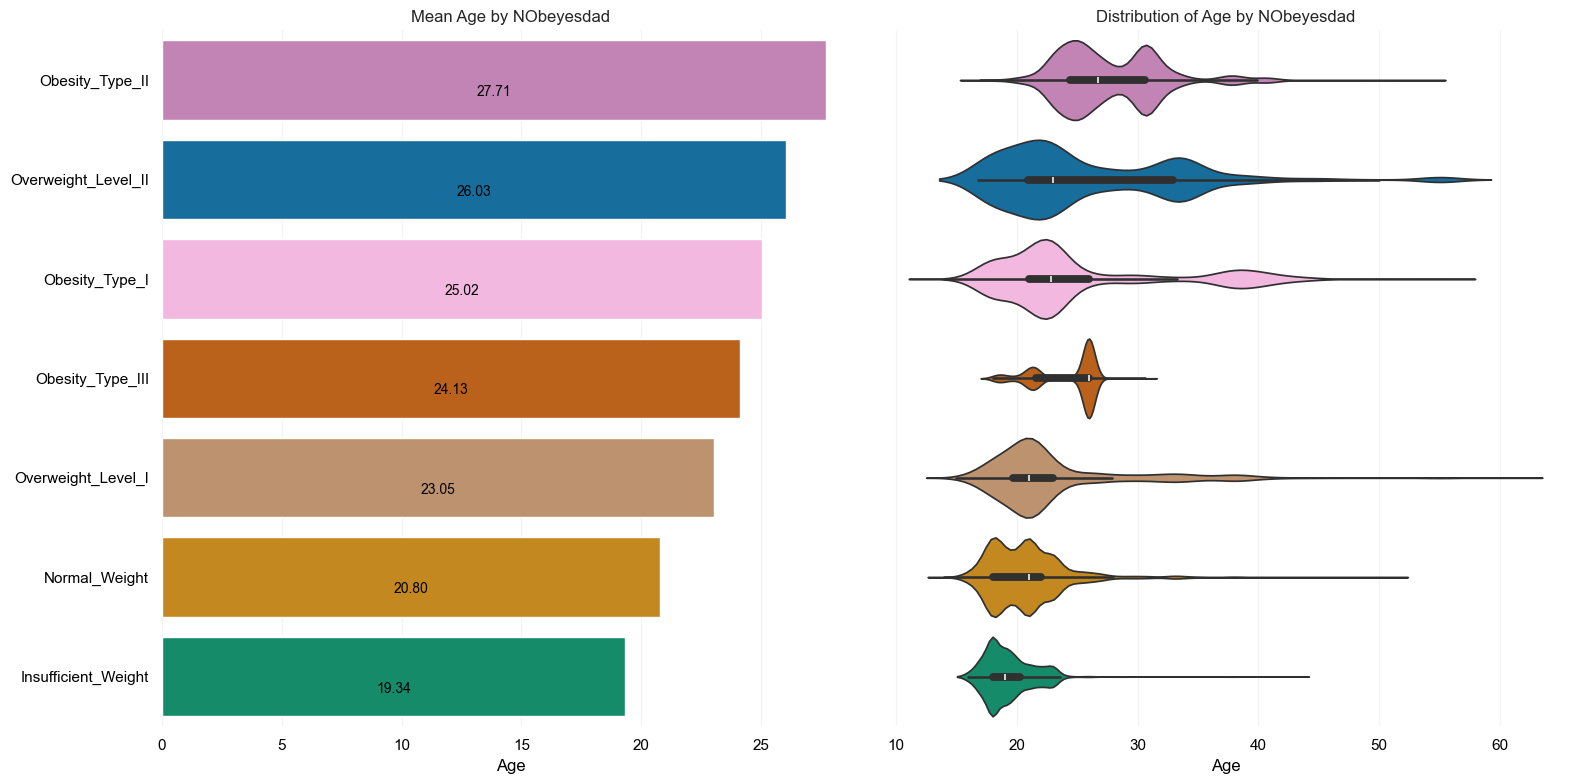

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax1 = axes[0]
df_sort = (
    df_train.groupby("NObeyesdad")["Age"].mean().sort_values(ascending=False).index
)
sns.barplot(
    x="Age",
    y="NObeyesdad",
    data=df_train,
    palette=default_palette,
    hue="NObeyesdad",
    legend=False,
    errorbar=None,
    order=df_sort,
    estimator=np.mean,
    err_kws={"linewidth": 0},
    ax=ax1,
)
for p in ax1.patches:
    ax1.annotate(
        f"{p.get_width():.2f}",
        (p.get_x() + p.get_width() / 2.0, p.get_y() + p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 20),
        textcoords="offset points",
        fontsize=10,
        color="black",
    )
ax1.set_title("Mean Age by NObeyesdad")
ax1.set_xlabel("Age")
ax1.set_ylabel("")
sns.despine(left=True, bottom=True, ax=ax1)

# Violin Plot
ax2 = axes[1]
sns.violinplot(
    x="Age",
    y="NObeyesdad",
    data=df_train,
    palette=default_palette,
    hue="NObeyesdad",
    legend=False,
    order=df_sort,
    ax=ax2,
)
ax2.set_title("Distribution of Age by NObeyesdad")
ax2.set_ylabel("")
plt.yticks([])
sns.despine(left=True, bottom=True, ax=ax2)
plt.tight_layout()
plt.show()

### Mode of transport vs target

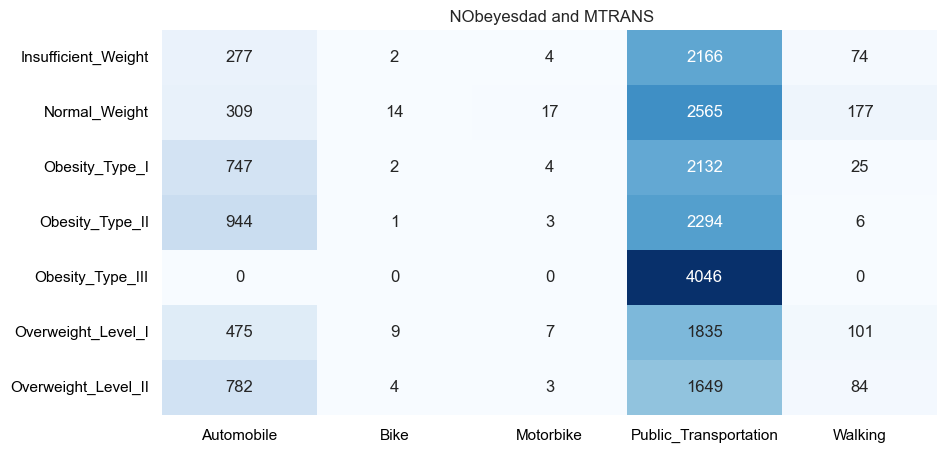

In [26]:
cross_tab = pd.crosstab(df_train["NObeyesdad"], df_train["MTRANS"])
plt.figure(figsize=(10, 5))
sns.heatmap(cross_tab, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title(" NObeyesdad and MTRANS")
plt.xlabel("")
plt.ylabel("")
plt.show()

### Distribution of target vs gender

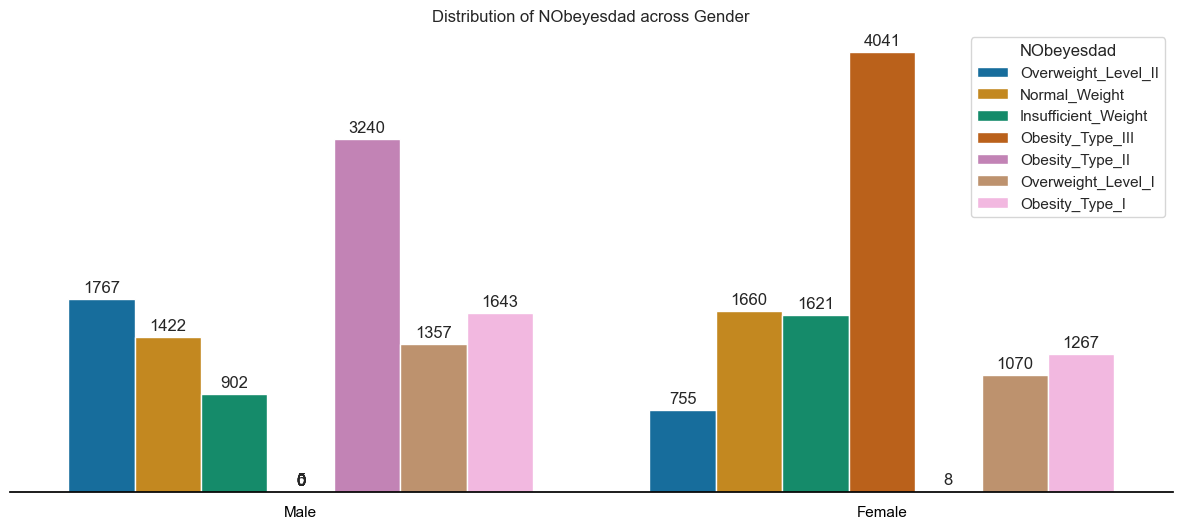

In [27]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(
    x="Gender", hue="NObeyesdad", data=df_train, palette=default_palette, dodge=True
)
plt.title("Distribution of NObeyesdad across Gender")
sns.despine(left=True, bottom=False)
plt.xlabel("")
plt.ylabel("")
plt.yticks([])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{round(height)}",
        (p.get_x() + p.get_width() / 2.0, height),
        ha="center",
        va="center",
        xytext=(0, 8),
        textcoords="offset points",
    )
plt.show()

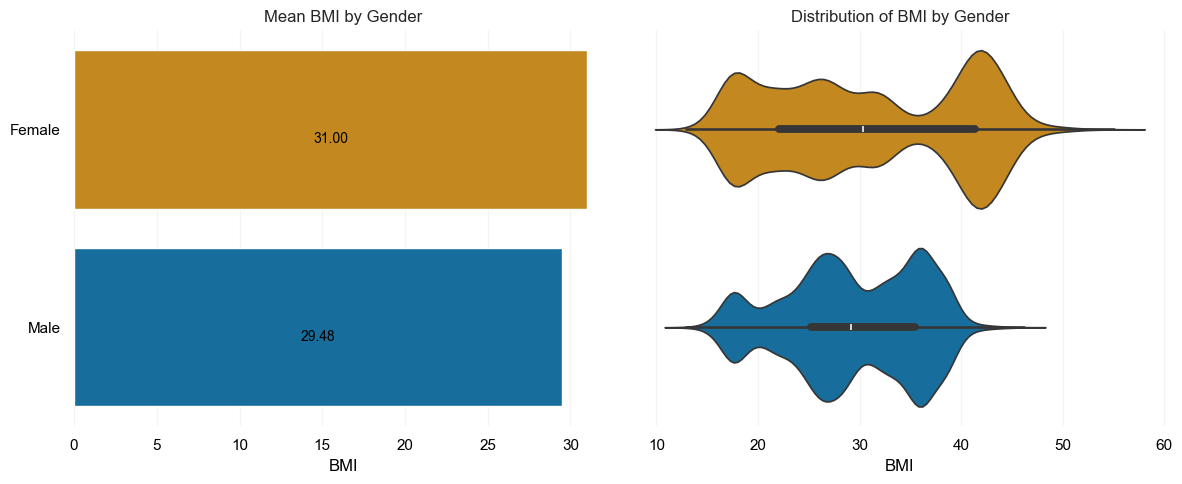

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ax1 = axes[0]
df_sort = df_train.groupby("Gender")["BMI"].mean().sort_values(ascending=False).index
sns.barplot(
    x="BMI",
    y="Gender",
    data=df_train,
    palette=default_palette,
    hue="Gender",
    legend=False,
    order=df_sort,
    estimator=np.mean,
    errorbar=None,
    err_kws={"linewidth": 0},
    ax=ax1,
)
for p in ax1.patches:
    ax1.annotate(
        f"{p.get_width():.2f}",
        (p.get_x() + p.get_width() / 2.0, p.get_y() + p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 50),
        textcoords="offset points",
        fontsize=10,
        color="black",
    )
ax1.set_title("Mean BMI by Gender")
ax1.set_xlabel("BMI")
ax1.set_ylabel("")
sns.despine(left=True, bottom=True, ax=ax1)
# Violin Plot
ax2 = axes[1]
sns.violinplot(
    x="BMI",
    y="Gender",
    data=df_train,
    palette=default_palette,
    hue="Gender",
    legend=False,
    order=df_sort,
    ax=ax2,
)
ax2.set_title("Distribution of BMI by Gender")
ax2.set_ylabel("")
plt.yticks([])
sns.despine(left=True, bottom=True, ax=ax2)
plt.tight_layout()
plt.show()

### Correlation heatmap

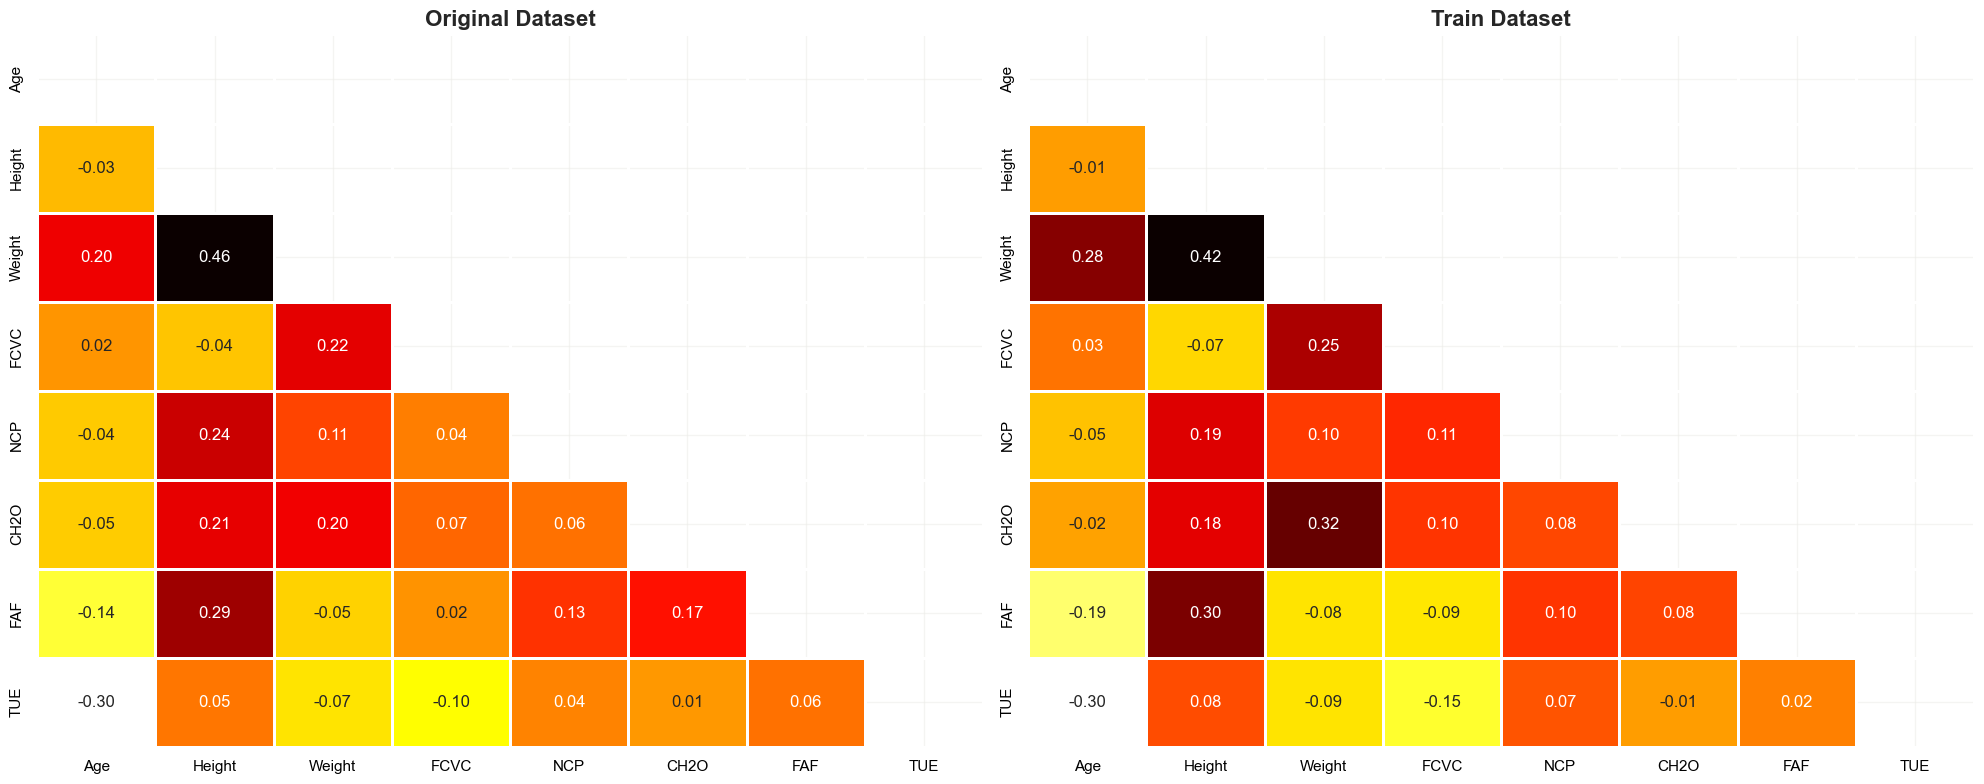

In [29]:
numeric_columns_original = df_original.select_dtypes(include=np.number)
numeric_columns_train = df_train.select_dtypes(include=np.number).drop(
    ["id", "BMI"], axis=1
)
# original
corr_original = numeric_columns_original.corr(method="pearson")
mask_original = np.triu(np.ones_like(corr_original))
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(
    corr_original,
    annot=True,
    fmt=".2f",
    mask=mask_original,
    cmap="hot_r",
    cbar=None,
    linewidth=2,
    ax=axes[0],
)
axes[0].set_title("Original Dataset", fontsize=16, fontweight="bold")

# Train
corr_train = numeric_columns_train.corr(method="pearson")
mask_train = np.triu(np.ones_like(corr_train))
sns.heatmap(
    corr_train,
    annot=True,
    fmt=".2f",
    mask=mask_train,
    cmap="hot_r",
    cbar=None,
    linewidth=2,
    ax=axes[1],
)
axes[1].set_title("Train Dataset", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

## Check for outliers

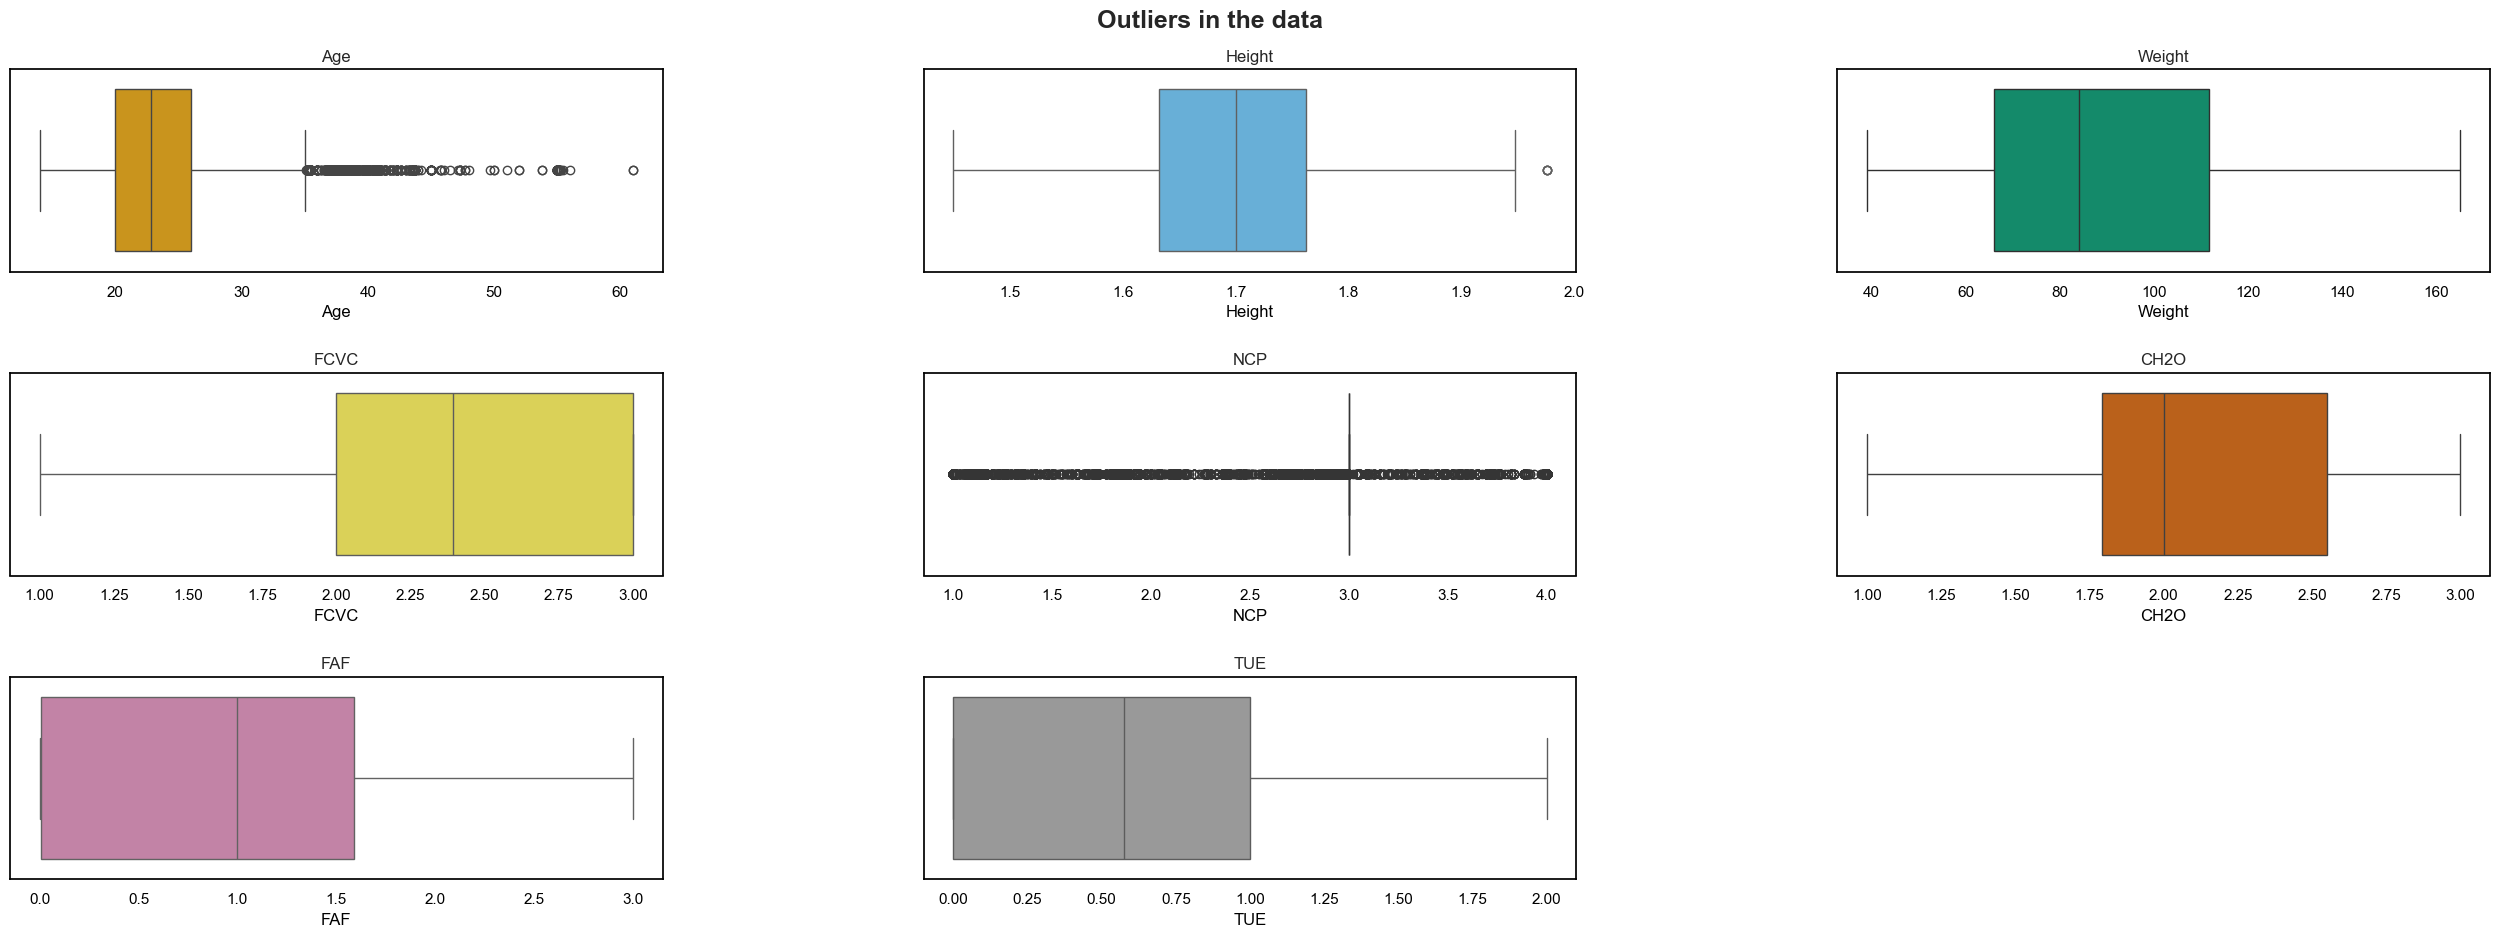

In [30]:
colors = [
    "#E69F00",
    "#56B4E9",
    "#009E73",
    "#F0E442",
    "#0072B2",
    "#D55E00",
    "#CC79A7",
    "#999999",
    "#577399",
]

fig = plt.figure(figsize=[32, 10])
plt.suptitle("Outliers in the data", fontsize=18, fontweight="bold")
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i, col in enumerate(numeric_columns):
    ax = fig.add_subplot(3, 3, i + 1)
    ax = sns.boxplot(data=df_train, x=col, color=colors[i])
    ax.set_title(f"{col}")
    ax.set_xlabel(f"{col}")
    ax.grid(False)
plt.show()